Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY**</u> | <u>**Prelim Examination**</u>
**Name** | Cuevas, Christian Jay L.
**Name** | Jimenez, Jerviz Mico
**Section** | CPE32S3
**Date Performed**: | 3/06/2024
**Date Submitted**: | 3/06/2024
**Instructor**: | Engr. Roman M. Richard  

<hr>

## ***INSTRUCTIONS:***
- Choose any dataset applicable for classification and/or prediction analysis problems.
- Show the application of the following algorithms:
- Linear Regression
 - Singular LR
 - Multiple LR
 - Polynomial LR
- Logistic Regression
- Decision Tree
- Random Forest
- Provide Evaluation reports for all models

### ***CONTEXT:***

This dataset contains 545 records about the various factors that affects the pricing of the house. Factors like the number of bedrooms, comfort rooms, area of the house, number of stories and its furnishing status. We aim to discover the relationship between each variable and how they affect the overall price of the house by using various methods relating to machine learning namely: Linear Regression, Logistic Regression, Data Tree Decision and Random Forest. We will also find which method suits this dataset and which are the methods that are not suitable.
<img src = "https://media.istockphoto.com/id/520265309/photo/san-antoniotexas-housing-development-neighborhood-suburbs-aerial-view.jpg?s=612x612&w=0&k=20&c=-LRc36KcWkLFutZAchbwCmiIQQQiFL8F_4mwgmXW-iM=">

### ***VARIABLES:***

* **Area**: The overall area of the house.
* **Bedrooms**: The number of bedrooms in the house.
* **Bathrooms**: The number of bathrooms in the house.
* **Stories**: The number of floors in the house.
* **Mainroad**: Whether the house is along the main road. (Yes/No)
* **Guestroom**: Whether the house has a guest room. (Yes/No)
* **Basement**: Whether the house has a basement. (Yes/No)
* **Hot Water Heating**: Whether the house has hot water heating.  (Yes/No)
* **AIrconditioning**: Whether the house has airconditioning.  (Yes/No)
* **Parking**: Number of available parking slots of the house.
* **Prefarea**: Whether the house is in a preferred area or not. (Yes/No)
* **Furnishing Status**: The furnishing status of the house (Furnished, Semi-furnished, Unfurnished)

***Target Variable***
* **Price**: The overall price of the houses.

### ***QUESTIONS TO BE ANSWERED:***

* Does having a large area affect the price of the house?
* Are the number of bedrooms and bathrooms related with the price of the house?
* Are there correlation between different factors that affect the housing price?
* What is the most important factor that affect the overall price of the house?
* What is the most suitable machine learning method for this type of dataset?

### ***DATA PREPROCESSING FOR LINEAR REGRESSION***

* Import all the libraries that you need.
* Import the dataset that you will be using.
* Check for null values and drop if necessary.
* Change any categorical variables if necessary.
* Split the data into train and test.
* Normalize the data so that we can avoid bias.

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import tree
from six import StringIO
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
#Declaring the dataset
housingDF = pd.read_csv("https://raw.githubusercontent.com/ChristianJayCuevas/CPE-019---Emerging-Technologies-2/main/Preliminaries%20Examination/Housing.csv")

In [5]:
#Checking the information of the dataset
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#Checking for null values
housingDF.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
#Checking the first 5 rows of the dataset
housingDF.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
#Function for converting categorical (Yes/No) to numerical variables
def ConvertCategorical(dfname, colname):
  dfname[colname] = dfname[colname].apply(lambda toLabel: 0 if toLabel ==
  'yes' else 1)

In [9]:
#Convert columns with (Yes/No) to 0 and 1
ConvertCategorical(housingDF, "mainroad")
ConvertCategorical(housingDF, "guestroom")
ConvertCategorical(housingDF, "basement")
ConvertCategorical(housingDF, "hotwaterheating")
ConvertCategorical(housingDF, "airconditioning")
ConvertCategorical(housingDF, "prefarea")

In [10]:
housingDF.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,furnished
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,furnished
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,semi-furnished
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,furnished
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,furnished


In [11]:
#Handle categorical data in column Furnished with dummy variable

Housing_dummy = pd.get_dummies(housingDF['furnishingstatus'])
Housing_dummy.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [12]:
#Drop the furnished column because it is redundant.

Housing_dummy = pd.get_dummies(housingDF['furnishingstatus'], drop_first = True)
Housing_dummy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [13]:
#Combine this to the original dataset and remove the furnishingstaus column

housingDF = pd.concat([housingDF, Housing_dummy], axis = 1)
housingDF.drop(['furnishingstatus'], axis = 1, inplace = True)
housingDF.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1,0
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0,0


In [14]:
#Data Normalization
col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
hDF = housingDF.copy()
scaler = MinMaxScaler()
hDF[col] = scaler.fit_transform(hDF[col])

In [15]:
hDF.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,0,1,1,1,0,0.666667,0,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,0,1,1,1,0,1.000000,1,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,0,1,0,1,1,0.666667,0,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,0,1,0,1,0,1.000000,0,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,0,0,0,1,0,0.666667,1,0,0


### ***UNDERSTANDING DATA***

* We will perform pearson correlation to understand the correlation of the predictor variables and the target variable.
* To further understand, we can visualize it using the heatmap.

In [16]:
housingDF.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.141284,0.822018,0.649541,0.954128,0.684404,0.693578,0.765138,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [17]:
hDF.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.261189,0.240587,0.393028,0.095413,0.268502,0.141284,0.822018,0.649541,0.954128,0.684404,0.231193,0.765138,0.416514,0.326606
std,0.161943,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.493434,0.469402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.134021,0.200000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.224242,0.202749,0.400000,0.000000,0.333333,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.345455,0.323711,0.400000,0.333333,0.333333,0.000000,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
hDF.corr(method="pearson", numeric_only = True)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,-0.296898,-0.255517,-0.187057,-0.093073,-0.452954,0.384394,-0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,-0.288874,-0.140297,-0.047417,0.009229,-0.222393,0.352980,-0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.012033,-0.080549,-0.097312,-0.046049,-0.160603,0.139270,-0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,-0.042398,-0.126469,-0.102106,-0.067159,-0.186915,0.177496,-0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,-0.121706,-0.043538,0.172394,-0.018847,-0.293602,0.045547,-0.044425,-0.003648,-0.082972
mainroad,-0.296898,-0.288874,0.012033,-0.042398,-0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,-0.204433,0.199876,-0.011450,0.133123
guestroom,-0.255517,-0.140297,-0.080549,-0.126469,-0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,-0.037466,0.160897,-0.005821,0.099023
basement,-0.187057,-0.047417,-0.097312,-0.102106,0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,-0.051497,0.228083,-0.050284,0.117935
hotwaterheating,-0.093073,0.009229,-0.046049,-0.067159,-0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.067864,-0.059411,-0.063819,0.059194
airconditioning,-0.452954,-0.222393,-0.160603,-0.186915,-0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,-0.159173,0.117382,0.053179,0.094086


<Axes: >

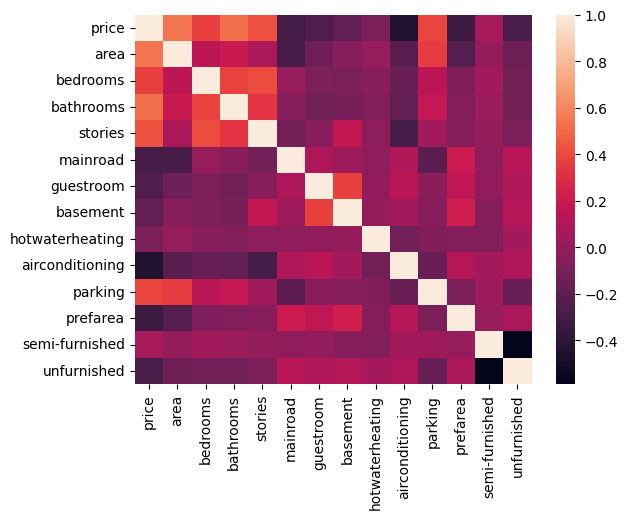

In [19]:
#To visualize the correlation between the variables of the dataset.
housingcorr = housingDF.corr(numeric_only = True)
sns.heatmap(housingcorr)

<hr>
OBSERVATION:

- From the correlation and heatmap above, we can infer that area has the highest positive correlation with the price. The value of its correlation with price is 0.5359 which can be interpreted as "Moderate positive correlation". With this in mind, we will proceed with the Linear Regression models by using this area as the independent variable and price as the target variable.
<hr>


## ***LINEAR REGRESSION***

###  **Singular Linear Regression**

- Singular Linear Regression is a method of regression which only uses 1 independent variable to predict the value of the target variable. This is typically used when the datapoints has a positive relationship with the target variable. It is typically visualized by plotting a scatter plot and then plotting the line of the predicted values.
- In this model, we will be using the predictor or column "area" to predict the target variable "price". In the context of the dataset, we want to find out the relationship between the area of the house and its price.


In [20]:
#Function for Singular Linear Regression

def SingularLR(dfname,col1,col2):
  #Declare the model
  model = LinearRegression()

  #Declare the X and y, X for independent, y for dependent
  X = dfname[col1].values.reshape(-1, 1)
  y = dfname[col2].values.reshape(-1, 1)

  #Split the dataset into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size =0.3, random_state=100)

  #Train the model
  model.fit(X_train, y_train)

  #Predict the values using model
  Y_pred = model.predict(X_test)

  #Evaluating the model
  MSE = mean_squared_error(y_test, Y_pred)
  R_squared = r2_score(y_test, Y_pred)
  score = model.score(X_train, y_train)
  print("Mean Squared Error:", MSE)
  print("R squared:", R_squared)
  print("Model score:", score)

  #Plot the actual and predicted
  plt.plot(X_test, y_test, "bo", label='Actual')
  plt.plot(X_test, Y_pred, color='red', label='Predicted')
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.legend()
  plt.show()


Mean Squared Error: 2767116536598.5312
R squared: 0.2951839057382545
Model score: 0.2830500764266308


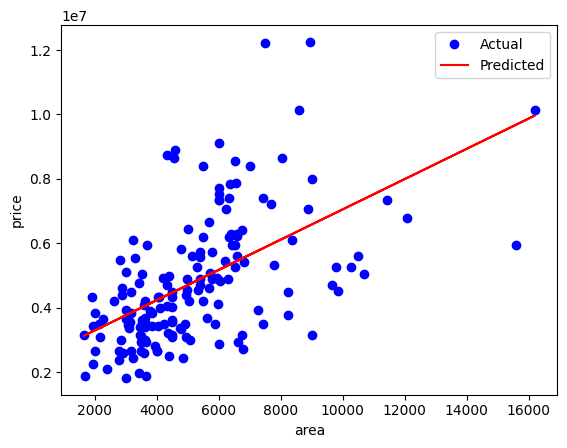

In [21]:
#Singular LR using the Original DataFrame
SingularLR(housingDF,"area", "price")

<hr>

**OBSERVATION AND ANALYSIS:**

- To show the effectiveness of normalizing the data, let's observe the values displayed above. We can see that the value of our MSE (Mean Squared Error) is very high, so high that it is in trillions. This is because of the nature of our dataset and the formula of the MSE.

- $\sum_{i=1}^{D}(x_i-y_i)^2$
- The formula of MSE is computed by subtracting the actual to the predicted values, squaring it and then getting the mean.
- The "prices" variable contains values ranging from 1,000,000 to 13,000,000. A little bit of error can lead to high value of MSE.
<hr>

Mean Squared Error: 0.020742613793583563
R squared: 0.2951839057382547
Model score: 0.2830500764266308


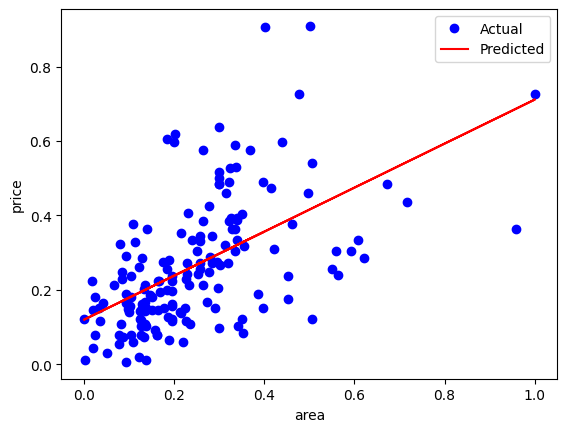

In [22]:
#Singular LR using the normalized dataframe
SingularLR(hDF, "area", "price")

<hr>

**OBSERVATION AND ANALYSIS:**

- This is the result of the dataset with normalized data using the MinMaxScaler(). We can observe that the R squared and the Model score is practically the same but the MSE is significantly lower. This can avoid bias and confusing results.
- The coefficient of determination ($R^2$) and model score are essentially the same but with different application. $R^2$ is the measure of how well your model can explain the variability in the data. The closer $R^2$ is to 1, the the more accurate your model is.
- The result of both models above for MSE and $R^2$ can be interpreted as both low. Low MSE means that the predicted values are close to the actual values. Low $R^2$ means that even if the model has high accuracy, it can't explain the variability in the model.

<hr>

### **Multiple Linear Regression**

- Multiple linear regression, like the singular linear regression, predicts the values of the target variable by using predictor variables.
- Their main difference is that the Multiple LR uses multiple predictor variables while the Singular Linear Regression uses only one predictor variable.
- In this model, we will be using all the predictor variables to predict the value of the target variable.


In [23]:
def MultipleLR(dfname,col1,col2):
  #Declare the model
  model = LinearRegression()

  #Declare the X and y, X for independent, y for dependent
  X = dfname[col1]
  y = dfname[col2]

  #Split the dataset into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size =0.3, random_state=100)

  #Train the model
  model.fit(X_train, y_train)

  #Predict the values using model
  Y_pred = model.predict(X_test)

  #Evaluating the model
  MSE = mean_squared_error(y_test, Y_pred)
  R_squared = r2_score(y_test, Y_pred)
  score = model.score(X_train, y_train)
  print("Mean Squared Error:", MSE)
  print("R squared:", R_squared)
  print("Model score:", score)

  #Plot the actual and predicted
  sns.scatterplot(x= y_test,y= Y_pred, color="blue", label = "Actual")
  sns.regplot(x=y_test, y=Y_pred, scatter=False, color="red", label = "Predicted")
  plt.legend()
  plt.show()


Mean Squared Error: 0.009624780513466765
R squared: 0.6729582743459919
Model score: 0.6814893088451202


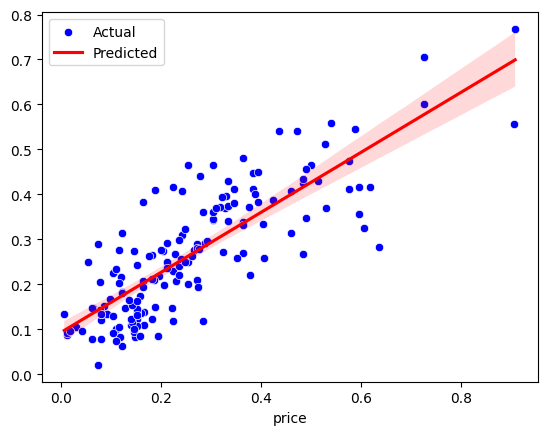

In [24]:
#Multiple Linear Regression using all the variables
MultipleLR(hDF,["area","bathrooms","bedrooms","stories",
                "parking","mainroad","guestroom","basement",
                "hotwaterheating","airconditioning", "prefarea",
                "semi-furnished","unfurnished"], "price")

<hr>

**OBSERVATION AND ANALYSIS:**

- We can observe here that the MSE of our model is significantly low which means that the predicted values are close to the actual values.
- The improvement of the $R^2$ compared to the Singular LR can also be observed. From the previous 0.29 to now 0.68, the value is considerably closer to 1. This indicates that our model is well-fitted than the previous Singular LR.


<hr>

###Feature Selection in Multiple LR
- We can do feature selection by employing backward selection. This will help us further understand the weight of each variable to the overall model.
- We can do backward selection by removing one variable at a time and then observing the model score.

Mean Squared Error: 1317362160645.1833
R squared: 0.6644528553410672
Model score: 0.6763231917139603


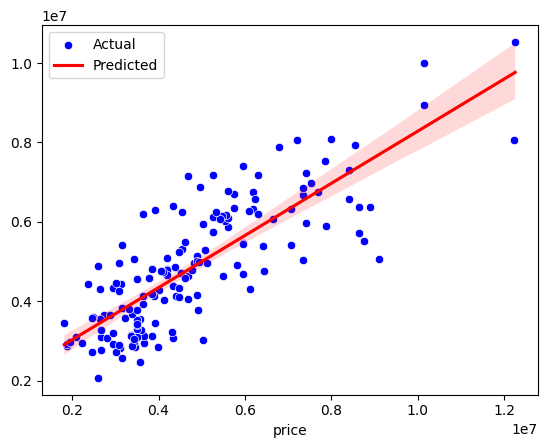

In [25]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories",
                      "parking","mainroad","guestroom",
                      "basement","hotwaterheating",
                      "airconditioning", "prefarea", "semi-furnished"], "price")

Mean Squared Error: 1319542654120.0776
R squared: 0.6638974588211839
Model score: 0.6731864539179915


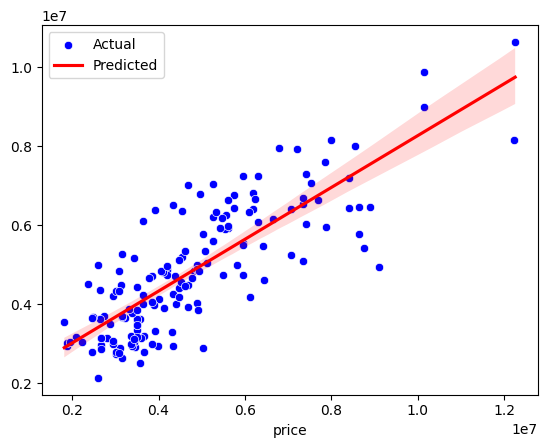

In [26]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories",
                      "parking","mainroad","guestroom",
                      "basement","hotwaterheating",
                      "airconditioning", "prefarea"], "price")

Mean Squared Error: 1371355563291.646
R squared: 0.6507001208010319
Model score: 0.6503704443515087


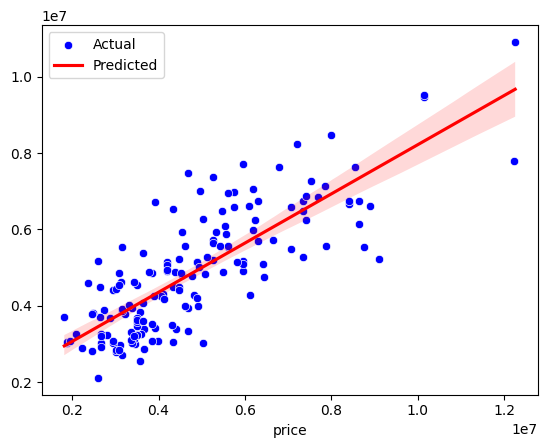

In [27]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories",
                      "parking","mainroad","guestroom",
                      "basement","hotwaterheating",
                      "airconditioning"], "price")

Mean Squared Error: 1596181180179.642
R squared: 0.5934344758275925
Model score: 0.6176199527126004


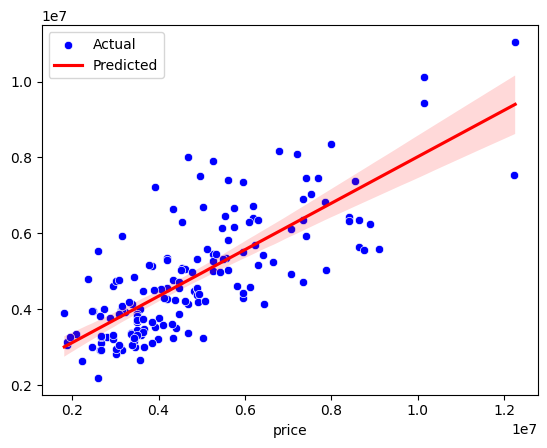

In [28]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories",
                      "parking","mainroad","guestroom",
                      "basement","hotwaterheating"], "price")

Mean Squared Error: 1600468514449.9172
R squared: 0.5923424429640671
Model score: 0.6121570311416415


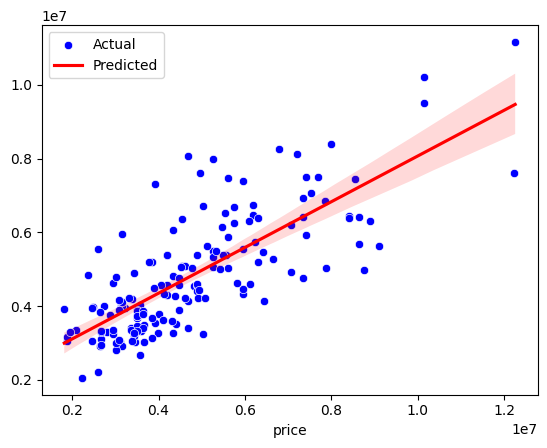

In [29]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories",
                      "parking","mainroad","guestroom",
                      "basement"], "price")

Mean Squared Error: 1696013297880.279
R squared: 0.5680060985442361
Model score: 0.6021523359811242


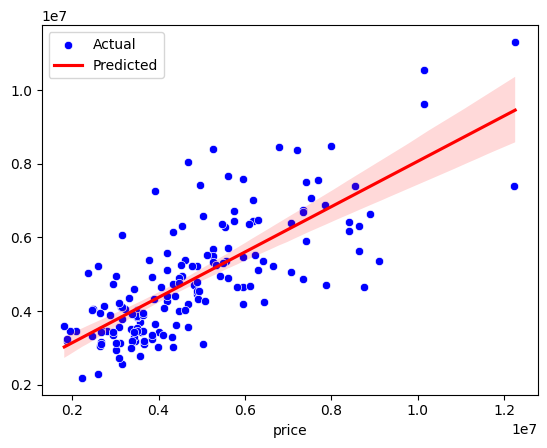

In [30]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories",
                      "parking","mainroad","guestroom"], "price")

Mean Squared Error: 1795514908871.955
R squared: 0.5426619050835182
Model score: 0.5866578183189217


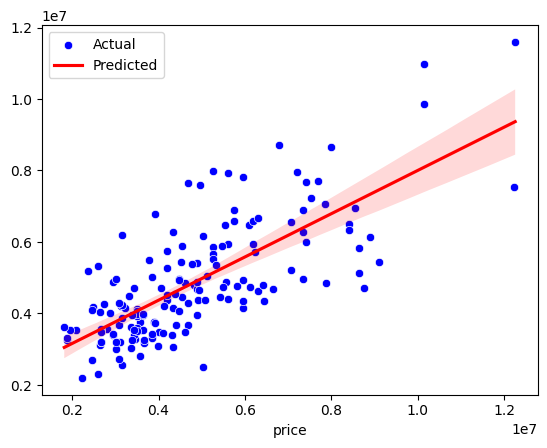

In [31]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories",
                      "parking","mainroad"], "price")

Mean Squared Error: 1814945930172.8425
R squared: 0.5377126026744323
Model score: 0.5694758828594698


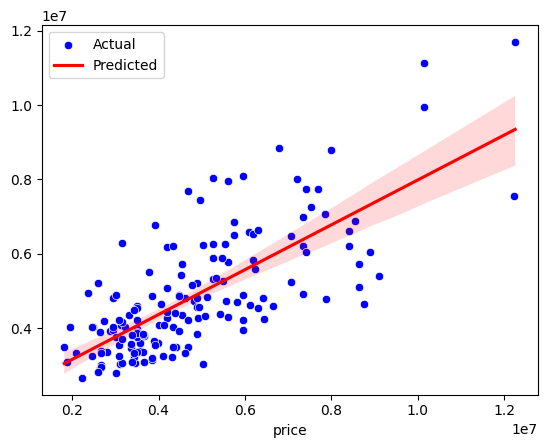

In [32]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories",
                      "parking"], "price")

Mean Squared Error: 1966344304559.6426
R squared: 0.4991497125678769
Model score: 0.5506432486806445


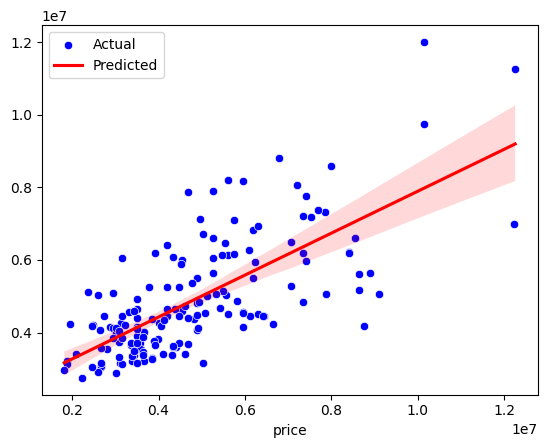

In [33]:
MultipleLR(housingDF,["area","bathrooms","bedrooms","stories"], "price")

Mean Squared Error: 2178214570368.3125
R squared: 0.4451839430520662
Model score: 0.5048961583598683


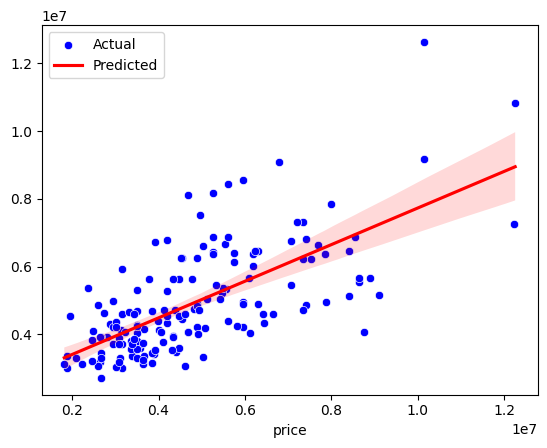

In [34]:
MultipleLR(housingDF,["area","bathrooms","bedrooms"], "price")

Mean Squared Error: 2232317113051.4766
R squared: 0.4314034093017779
Model score: 0.4795206191333461


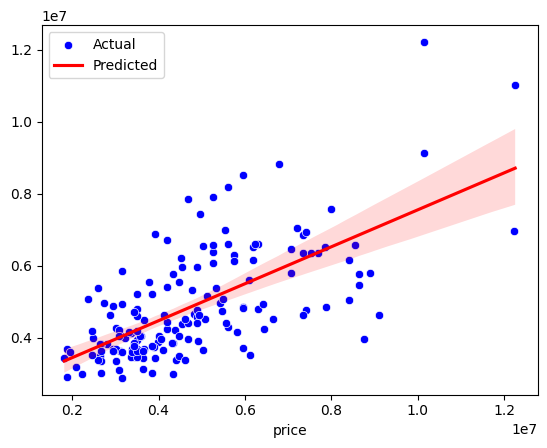

In [35]:
MultipleLR(housingDF,["area","bathrooms"], "price")

<hr>

**Observations and Analysis**

- Here we can observe the various changes that occured when we remove one variable at a time. The most significant change that we can observe is observable drop to the model score when we removed "airconditioning" and "stories" columns.
- Their drop in model score signifies that "airconditioning" and "stories" have significant weight to the overall prediction of the model.
- The backward elimination is a good way to observe the behavior of the model and to evaluate it.

<hr>

### **Polynomial Linear Regression**

- Polynomial Linear Regression, like the previous models, uses independent an variable to predict the target variable but it is not confined with lines. We can adjust the nth degree of the model to get the regression that we need.
- Polynomial Linear Regression uses 1 independent variable and 1 dependent variable like the Singular LR. The difference is that with Singular LR, we assume that the relationship between the two variables is a straight line, while in Polynomial Linear Regression, it can accomodate curvature or non-linearity.
- Polynomial Linear Regression can be more useful in certain real-life scenarios than the Singular LR.

In [36]:
def PolynomialLR(dfname, col1, col2):
    # Declare model
    model = LinearRegression()

    # Declare for polynomial features and set degree to 2
    poly = PolynomialFeatures(degree=2, include_bias=True)

    # Declare the X and y, X for independent, y for dependent
    X = dfname[col1].values.reshape(-1, 1)
    y = dfname[col2].values.reshape(-1, 1)

    # Split the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                             test_size=0.3, random_state=100)

    # Generate polynomial features for training and testing data
    x_train_trans = poly.fit_transform(X_train)
    x_test_trans = poly.transform(X_test)

    # Train model
    model.fit(x_train_trans, y_train)
    X_new = np.linspace(np.min(X), np.max(X), 200).reshape(-1, 1)
    X_new_poly = poly.transform(X_new)
    y_new = model.predict(X_new_poly)

    # Evaluating the model
    MSE = mean_squared_error(y_test, model.predict(x_test_trans))
    R_squared = r2_score(y_test, model.predict(x_test_trans))
    score = model.score(x_train_trans, y_train)
    print("Mean Squared Error:", MSE)
    print("R squared:", R_squared)
    print("Model score:", score)

    # Plot the model
    plt.plot(X_train, y_train, "bo", label='Actual')
    plt.plot(X_new, y_new, color='red', label='Predicted')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.show()

Mean Squared Error: 0.020746394305601948
R squared: 0.295055447206383
Model score: 0.3279616409018167


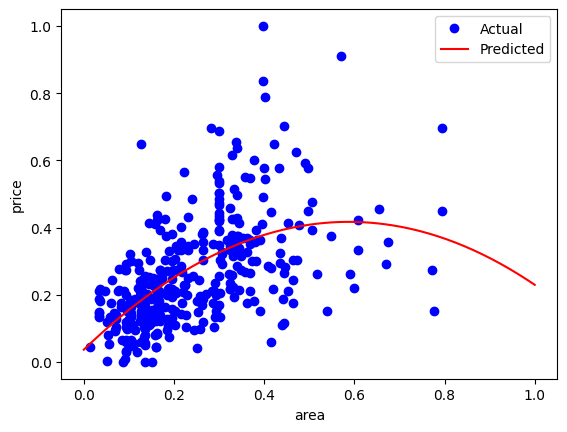

In [37]:
PolynomialLR(hDF,"area", "price")

<hr>

**Observation and Analysis**

- Here we can observe that from the original straight line in the previous Singular LR, the Red line became a curve. We can observe that the curve goes down, which is actually the opposite direction of the previous Singular LR which goes straight up.
- Our model has a low MSE with the value of 0.02 and also low $R^2$ or model score with the value of 0.32 which means that this model has fairly accurate prediction but it can't explain the variance of the dataset.

<hr>

## ***Data Preprocessing for Classification Algorithms***

- Adding labels to the continuous value of our target variable "price" so that it can categorized.
- By using pandas.cut(), we can set a range and labels for every range.
 - Our range of values are, bins = [1740000, 3000000, 6000000, 9000000, 1000000000]
  - Our labels are, labels=[0, 1, 2, 3]
  - For the 1st label 0, its range is from 1740001 to 3000000
  - For the 2nd label 1, its range is from 3000001 to 6000000
  - For the 3rd label 2, its range is from 6000001 to 9000000
  - For the 4th label 3, its range is from 9000001 to 1000000000

- We decided to categorize each by dividing them into 4. The meaning of the 4 labels from 0 to 3 respectiveley are "Affordable", "Moderate", "Expensive", and "Luxury".

In [38]:
#Creating a copy of the dataframe for the proceeding requirements

training = housingDF.copy()
training.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0,0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1,0
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0,0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0,0


In [39]:
#Splitting the price to different catagories based on the values

training['label'] = pd.cut(x=training['price'], bins=[1740000, 3000000, 6000000, 9000000, 1000000000],
                           labels=[0, 1, 2, 3])
training.head(493 - 495)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,label
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0,0,3
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0,0,3
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1,0,3
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0,0,3
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,1890000,3649,2,1,1,0,1,1,1,1,0,1,0,1,0
539,1855000,2990,2,1,1,1,1,1,1,1,1,1,0,1,0
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,0,1,0
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1,0,0


<hr>

**Observation and Analysis**
- As we can see from the updated dataframe above, there is an added column "label" which contains the labels for the values of the price. This is done to categorize them and so that we can use classification algorithms to predict the values of the target variable.

<hr>


## ***Logistic Regression***

- Logistic Regression is a type of regression used for discrete values such as 0 or 1 unlike the linear regression which is used for continuous values.
- The target value in logistic regression needs to be discrete and only has 0 and 1 unlike the other linear regression models where they use continuous values.
- The simplicity of this model makes it widely used for binary classification tasks in many fields.

In [40]:
def LogisticR(dfname, predictor, target):
    X = dfname[predictor].values.reshape(-1,1)
    y = dfname[target].values.reshape(-1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = linear_model.LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    print("Model Accuracy:", accuracy_score(y_test,y_pred))

    sns.regplot(x = X_test, y= y_test, logistic = True)
    plt.xlabel("label")
    plt.ylabel("airconditioning")
    plt.title("Logistic Regression")

              precision    recall  f1-score   support

           0       0.64      0.45      0.53        31
           1       0.80      0.90      0.85        78

    accuracy                           0.77       109
   macro avg       0.72      0.67      0.69       109
weighted avg       0.76      0.77      0.76       109

Model Accuracy: 0.7706422018348624


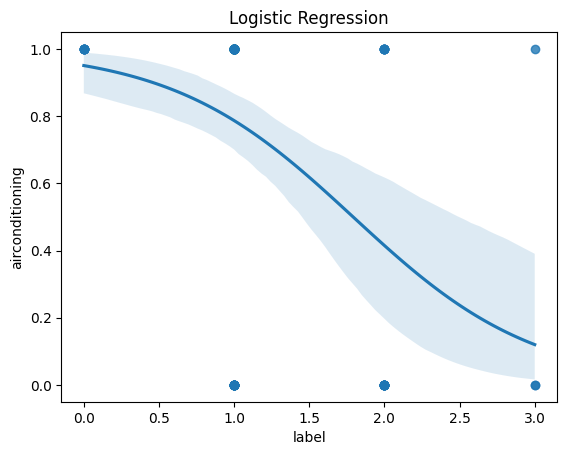

In [41]:
LogisticR(training ,"label", "airconditioning")

In [42]:
def LogisticR3(dfname, predictor, target):
    X = dfname[predictor].values.reshape(-1,1)
    y = dfname[target].values.reshape(-1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = linear_model.LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    names=[0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks,names)
    plt.yticks(tick_marks,names)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="BuPu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


[[14 17]
 [ 8 70]]


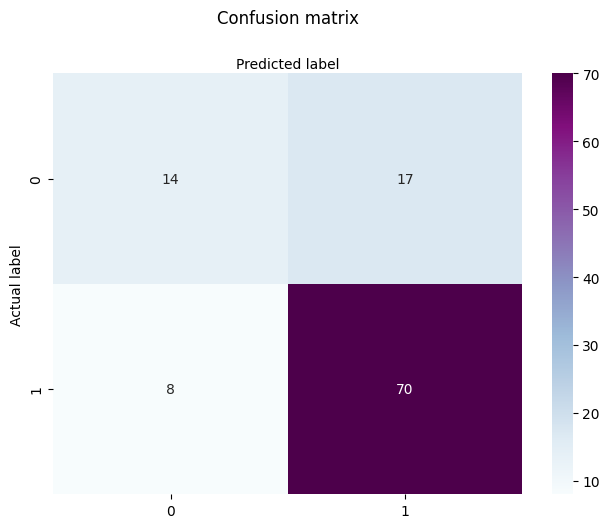

In [43]:
LogisticR3(training ,"label", "airconditioning")

<hr>

**Observation and Analysis**
- As you can observe in the logistic regression above, the first logistic regression shows the relationship between "airconditioning" and the "label". The 0 in the column of "airconditioning" represents the "Yes" while the 1 represents the "No". This means that as the label goes higher, the presence of "airconditioning" dwindles down or decreases.
- The accuracy of this model is 0.77 which is high and it is within the acceptable range of 70%-90% per the industry standards.
- Another evaluation of this model is with the confustion matrix. The diagonal values of the matrix represents the number of correct predictions which are 14 and 70. The number of correct predictions is higher than the incorrect, this further proves that this model is well-fitted.

<hr>

## ***Decision Tree***

- Decision Tree is one of the most popular classification algorithm that makes decisions based on the values of each features of the dataset.
- It is called the Decision Tree because for every decision it makes based on threshold, it splits into 2 nodes which represents a value with another feature and threshold. This will continue until the max depth that you set.
- The entropy here is one of the criteria for splitting the data into threshold. Entropy is the randomness of your data and by measuring the entropy, we will eventually be leading to a more homogenous data.

Feature Importance:
            Feature  Importance
0              area    0.523097
2         bathrooms    0.171232
12      unfurnished    0.144353
8   airconditioning    0.057293
9           parking    0.053250
3           stories    0.050775
1          bedrooms    0.000000
4          mainroad    0.000000
5         guestroom    0.000000
6          basement    0.000000
7   hotwaterheating    0.000000
10         prefarea    0.000000
11   semi-furnished    0.000000

Model Score: 0.7211009174311926


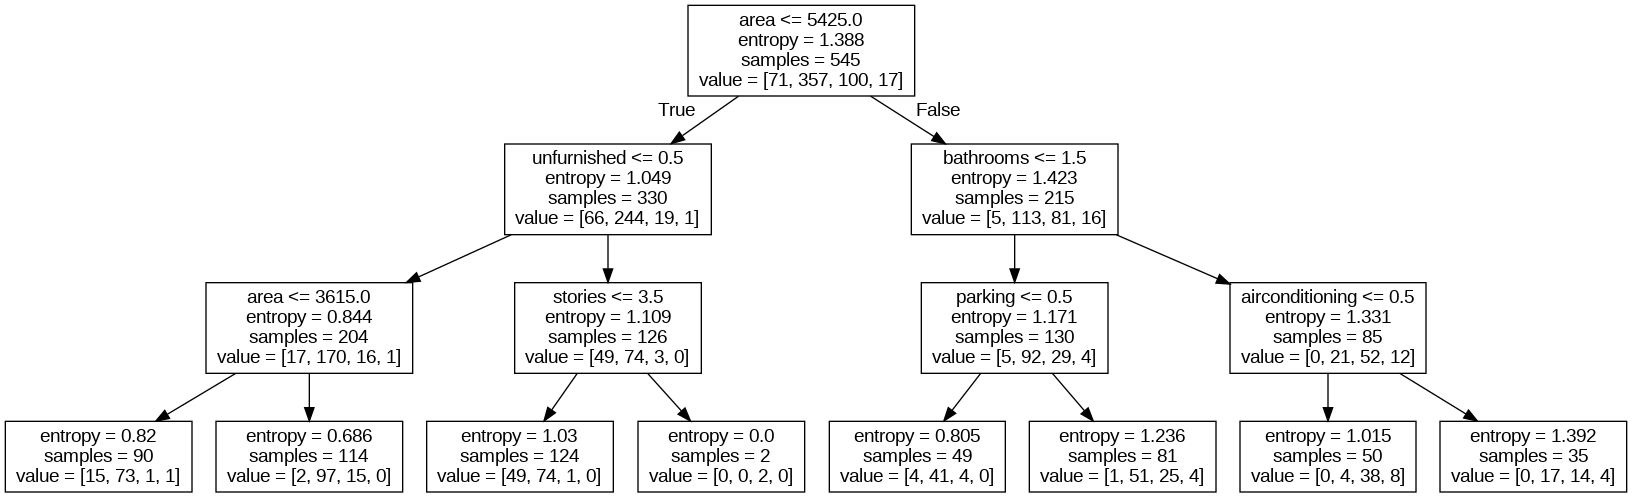

In [51]:
#Importing Libraries

from sklearn import tree
from six import StringIO
from IPython.display import Image

#Deciding the target variable
y_target = training["label"].values

#Initiating the variables to be included in the decision tree
columns = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea","semi-furnished","unfurnished"]
X_input = training[list(columns)].values

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_input, y_target)


f_importance = pd.DataFrame({'Feature': columns, 'Importance': clf_train.feature_importances_})
print("Feature Importance:")
print(f_importance.sort_values(by='Importance', ascending = False))
model_score = clf_train.score(X_input, y_target)
print("\nModel Score:", model_score)


#Creating the file
with open(".PriceRange.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

#Converting .dot to .png
!dot -Tpng .PriceRange.dot -o .PriceRange.png

#Print the decision tree
Image(".PriceRange.png")

<hr>

**Observation and Analysis**


- The decision tree relies on the mean data of each variable and splits it into either true or false.
- The variables under each decision changes after the initial decision and continues to work down until it reaches the last variable.
- The variables to be considered are dependent on the feature importance.

<hr>

## ***Random Forest***

- Random Forest is the combination of many decision trees which has different features.
- Random Forest is more accurate, precise and reliable than decision trees because it is built upon many decision trees. It combines the prediction of many decision trees so it has a better performance than decision trees.

In [52]:
columns = ["area","bathrooms","bedrooms","stories",
                      "parking","mainroad","guestroom",
                      "basement","hotwaterheating",
                      "airconditioning", "prefarea", "semi-furnished"]

In [55]:
#Importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


#Creating the model
X = training[columns]
y = training['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

f_importance = pd.DataFrame({'Feature': columns, 'Importance': rf.feature_importances_})
print("Feature Importance:")
print(f_importance.sort_values(by='Importance', ascending = False))


#Checking the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

Feature Importance:
            Feature  Importance
0              area    0.350727
3           stories    0.101037
1         bathrooms    0.089292
2          bedrooms    0.081663
4           parking    0.076225
9   airconditioning    0.063988
7          basement    0.050813
11   semi-furnished    0.050264
10         prefarea    0.046741
5          mainroad    0.033802
6         guestroom    0.033602
8   hotwaterheating    0.021848

Model Accuracy: 0.7798165137614679


In [ ]:
#This can display a certain range of estimators
for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [92]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pydotplus
def display_decision_tree(rf, tree_index, X_train):
    tree = rf.estimators_[tree_index]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png("tree.png")  # Save the tree as a PNG file
    plt.figure(figsize=(10, 5))
    plt.imshow(plt.imread("tree.png"))
    plt.axis('off')
    plt.show()

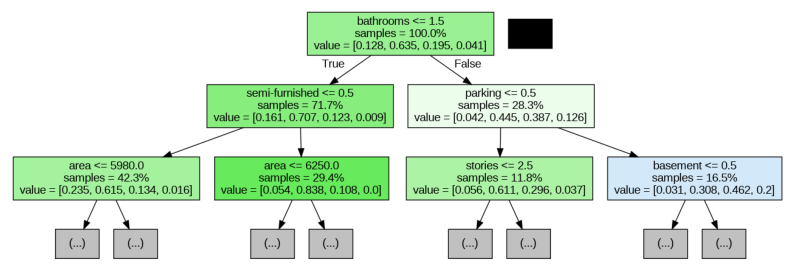

In [93]:
display_decision_tree(rf, 0, X_train)

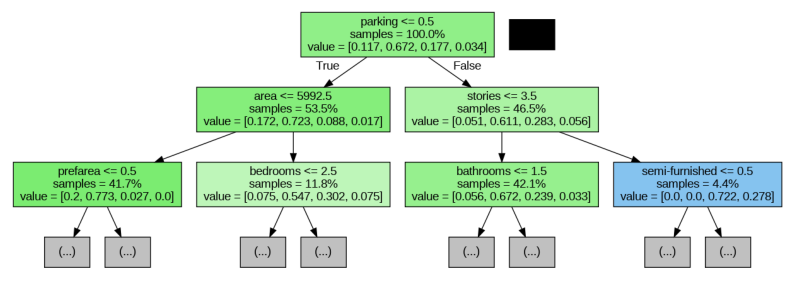

In [94]:
display_decision_tree(rf, 1, X_train)

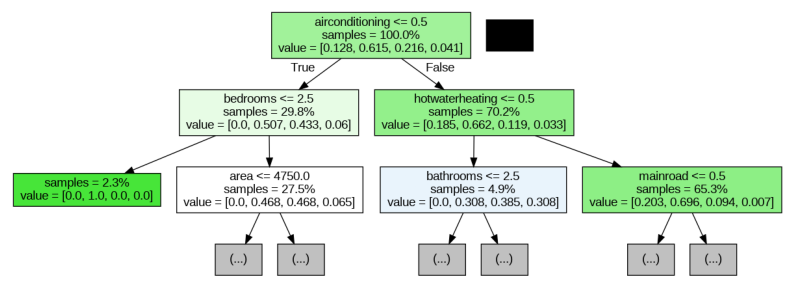

In [95]:
display_decision_tree(rf, 2, X_train)

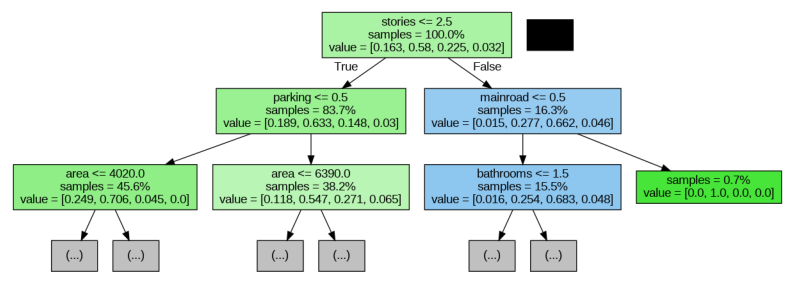

In [96]:
display_decision_tree(rf, 3, X_train)

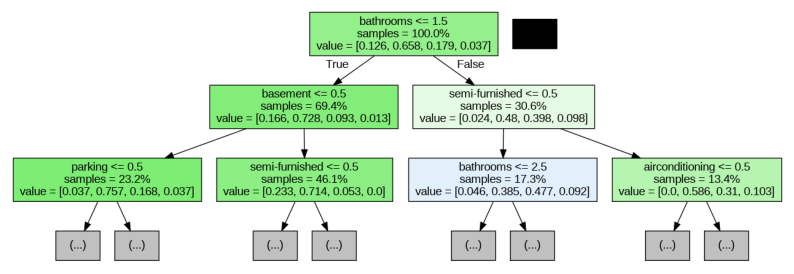

In [97]:
display_decision_tree(rf, 4, X_train)

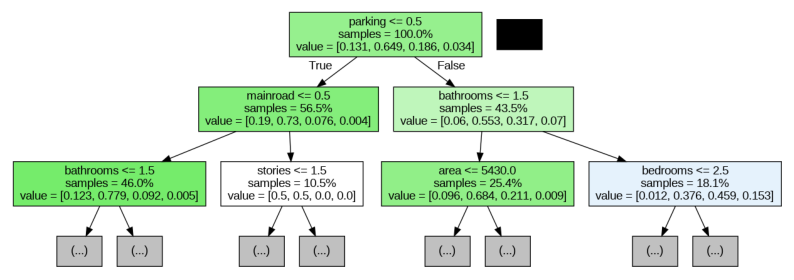

In [98]:
display_decision_tree(rf, 5, X_train)

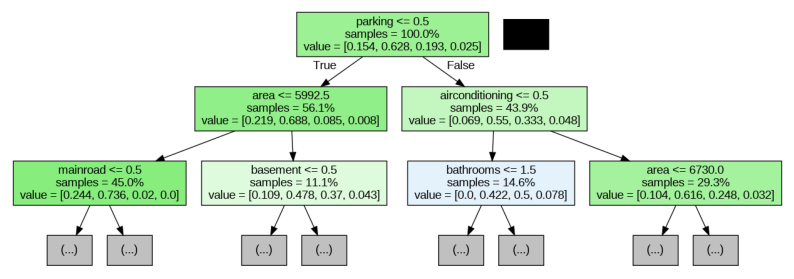

In [99]:
display_decision_tree(rf, 6, X_train)

<hr>

**Observation and Analysis**

- The random forest takes into account all the variables in the data set and creates a decision tree.
-The decision tree variables are all random and then show the percentage of the values that satisfy the condition


<hr>